## Bar charts

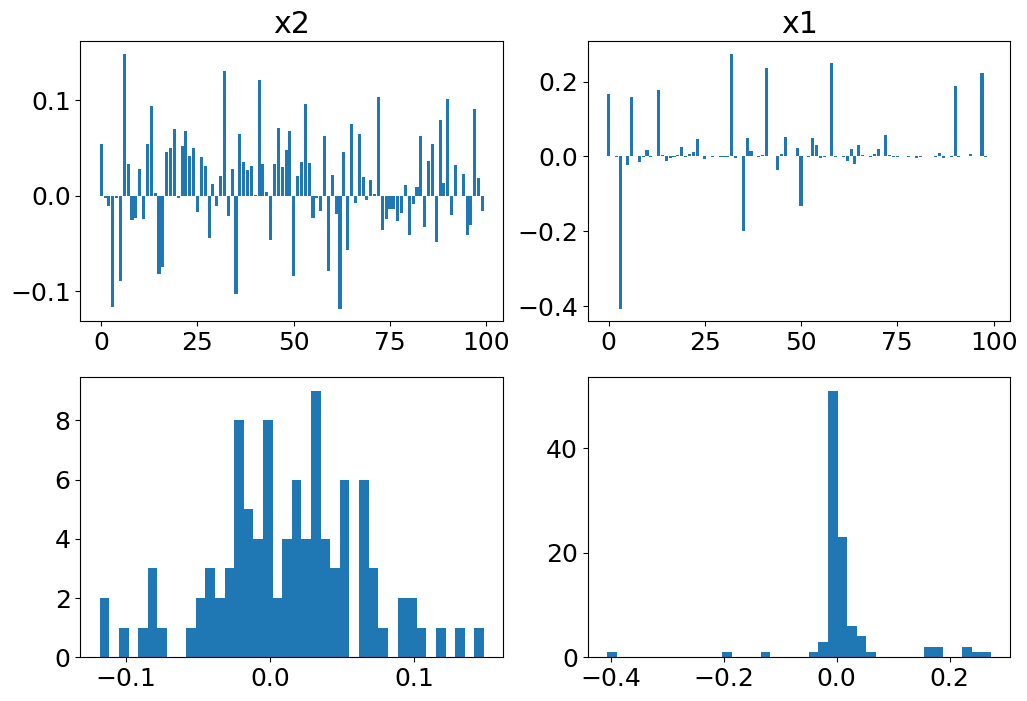

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams
rcParams.update({'font.size': 18})

# Underdetermined
# n < m making the system underdetermined. 
n = 20
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

# Two objective functions 

def two_norm(x):
    return np.linalg.norm(x,ord=2)

def one_norm(x):
    return np.linalg.norm(x,ord=1)

# Set up an underdetermined system of equations, Ax - b, where A is n by m matrix, b is a vecto rof length n. 
constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b})
x0 = np.random.rand(m)

# Perform optimization - uses the `minimize` function from `scipy.optimize` to find the `x` that minimize the objective function while satisfying the constraints. 
# SLSQP: Sequential Least Squares Programming
res = minimize(two_norm, x0, method='SLSQP',constraints=constr)
x2 = res.x # x2: solution vector for the objective function `two_norm`

res = minimize(one_norm, x0, method='SLSQP',constraints=constr)
x1 = res.x # x1: solution vector for the objective function `one_norm`

plt.rcParams['figure.figsize'] = [12, 8]
fig,axs = plt.subplots(2,2)

# .reshpae() ensure you can easily access and work with each subplot
# without reshaping we need to access the subplots using two indices, such as axs[0, 0], axs[0, 1] etc.
axs = axs.reshape(-1)

"""
top 2 plots are bar plots of `x2` and `x1`, which shows the values of the solution vectors. 
x-axis has been set as `range(m)`, and y-axis has been set as `x2` and `x1` (the value of solution vectors).

Syntax: `.bar(x = range(m), height = x2)`
"""
axs[0].bar(range(m),x2)
axs[0].set_title('x2')
axs[1].bar(range(m),x1)
axs[1].set_title('x1')

"""
The bottom 2 plots are histograms of `x2` and `x1`, which shows the distribution of the values of the solution vectors.

Syntax: `plt.hist(x = bins[:-1], bins = 40)`
"""
axs[2].hist(x2,40)
axs[3].hist(x1,40)

plt.show()